In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data_all = pd.read_csv('baseball_all.csv')
data_all = data_all.drop('Unnamed: 0', axis=1)
players = pd.read_csv('players.csv')
players = players.drop('Unnamed: 0', axis=1)

In [3]:
#drop the ones that go into "scores"
players = players.drop(['Early_Connection','Rotational_Acceleration','On_Plane_Efficiency'], axis=1)
players = players.drop([4], axis=0)

In [4]:
vbas = []
attack = []
for index, row in players.iterrows():
    vbas+=[abs(row.Vertical_Bat_Angle+25)]
    attack+=[abs(row.Attack_Angle-10)]
players['Vertical_Bat_Angle'] = vbas
players['Attack_Angle'] = attack

In [5]:
data = StandardScaler().fit_transform(players.drop(['Player','N_Swings','Handedness'],axis=1))
#data = StandardScaler().fit_transform(players.loc[:,['Bat_Speed','Attack_Angle','Power','Vertical_Bat_Angle']])

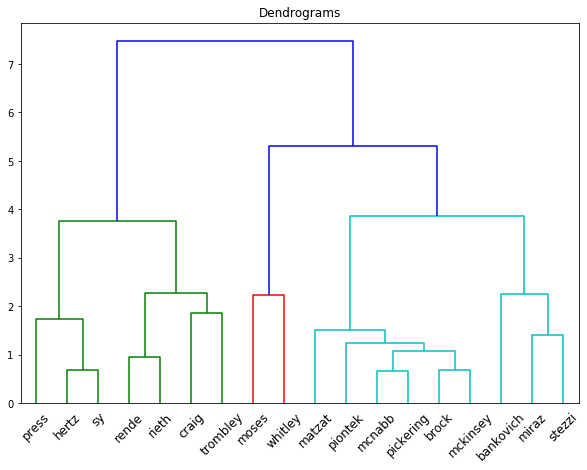

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'), labels = np.array(players.Player), leaf_rotation=45)

In [5]:
data_2020 = pd.read_excel('baseball.xlsx')
data_2019 = pd.read_excel('baseball_2019.xlsx')

In [6]:
avg = []
ops = []
slg = []
ob = []
for index, rows in players.iterrows():
    if rows.Player in np.array(data_2019.Player):
        avg += [float(data_2019.AVG[data_2019.Player == rows.Player])]
        ops += [float(data_2019.OPS[data_2019.Player == rows.Player])]
        slg += [float(data_2019['SLG%'][data_2019.Player == rows.Player])]
        ob += [float(data_2019['OB%'][data_2019.Player == rows.Player])]
    else:
        avg += [float(data_2020.AVG[data_2020.Player == rows.Player])]
        ops += [float(data_2020.OPS[data_2020.Player == rows.Player])]
        slg += [float(data_2020['SLG%'][data_2020.Player == rows.Player])]
        ob += [float(data_2020['OB%'][data_2020.Player == rows.Player])]        
players['avg'] = avg
players['ops'] = ops
players['slg'] = slg
players['ob']= ob

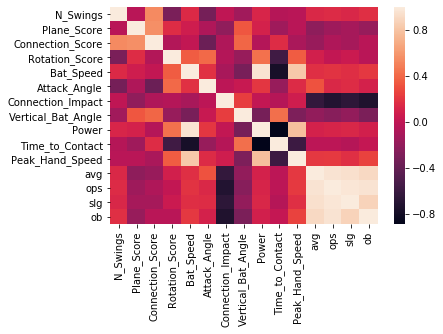

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = players.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [10]:
players.corr()

,N_Swings,Plane_Score,Connection_Score,Rotation_Score,Bat_Speed,Attack_Angle,Connection_Impact,Vertical_Bat_Angle,Power,Time_to_Contact,Peak_Hand_Speed,avg,ops,slg,ob
N_Swings,1.000000,-0.028650,0.536486,-0.305725,0.145594,-0.323538,0.001336,-0.129772,0.127881,-0.041156,-0.031260,0.143099,0.157105,0.131589,0.178262
Plane_Score,-0.028650,1.000000,0.562620,0.164554,0.076580,-0.072143,-0.204340,0.333246,0.101547,-0.137945,-0.032084,-0.213577,-0.143984,-0.108959,-0.178064
Connection_Score,0.536486,0.562620,1.000000,-0.057812,0.017116,-0.366995,-0.071835,0.388030,-0.050270,0.162952,-0.094402,-0.172187,-0.076750,-0.109470,-0.030064
Rotation_Score,-0.305725,0.164554,-0.057812,1.000000,0.357231,0.405907,-0.054217,-0.179275,0.436000,-0.567844,0.353867,0.088030,0.016072,0.049389,-0.027102
Bat_Speed,0.145594,0.076580,0.017116,0.357231,1.000000,0.186914,-0.103714,-0.310614,0.958096,-0.774250,0.823748,0.175454,0.195334,0.168915,0.214943
Attack_Angle,-0.323538,-0.072143,-0.366995,0.405907,0.186914,1.000000,-0.013862,0.034909,0.205723,-0.177009,0.154650,0.315116,0.143127,0.165763,0.104503
Connection_Impact,0.001336,-0.204340,-0.071835,-0.054217,-0.103714,-0.013862,1.000000,0.238999,0.014606,-0.045803,0.076387,-0.635107,-0.717165,-0.665409,-0.732073
Vertical_Bat_Angle,-0.129772,0.333246,0.388030,-0.179275,-0.310614,0.034909,0.238999,1.000000,-0.315633,0.427997,-0.289576,-0.198792,-0.244830,-0.191710,-0.294657
Power,0.127881,0.101547,-0.050270,0.436000,0.958096,0.205723,0.014606,-0.315633,1.000000,-0.889277,0.779383,0.104112,0.114793,0.131512,0.085627
Time_to_Contact,-0.041156,-0.137945,0.162952,-0.567844,-0.774250,-0.177009,-0.045803,0.427997,-0.889277,1.000000,-0.589336,-0.018027,-0.015265,-0.042184,0.019779


In [46]:
import statsmodels.api as sm

X = players.drop(['Player','N_Swings','Handedness', 'avg','ops','slg','ob'],axis=1)
y = players.avg

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    avg   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              41.43
Date:                Mon, 27 Apr 2020   Prob (F-statistic):                    1.30e-07
Time:                        23:07:42   Log-Likelihood:                          21.928
No. Observations:                  18   AIC:                                     -35.86
Df Residuals:                      14   BIC:                                     -32.30
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Plane_Score          -0.0031      0.002     -1.747      0.103      -0.007       0.001
Connection_Impact    -0.0113      0.003     -4.062      0.001      -0.017      -0.005
Time_to_Contact       3.1989      1.536      2.083      0.056      -0.095       6.493
Peak_Hand_Speed       0.0411      0.012      3.462      0.004       0.016       0.067
==============================================================================
Omnibus:                        0.224   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.894   Jarque-Bera (JB):                0.046
Skew:                          -0.091   Prob(JB):                        0.977
Kurtosis:                       2.832   Cond. No.                     8.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""